# TimeGAN Tutorial

## Time-series Generative Adversarial Networks

- Paper: Jinsung Yoon, Daniel Jarrett, Mihaela van der Schaar, "Time-series Generative Adversarial Networks," Neural Information Processing Systems (NeurIPS), 2019.

- Paper link: https://papers.nips.cc/paper/8789-time-series-generative-adversarial-networks

- Last updated Date: April 24th 2020

- Code author: Jinsung Yoon (jsyoon0823@gmail.com)

This notebook describes the user-guide of a time-series synthetic data generation application using timeGAN framework. We use Stock, Energy, and Sine dataset as examples.

### Prerequisite
Clone https://github.com/jsyoon0823/timeGAN.git to the current directory.

## Necessary packages and functions call

- timegan: Synthetic time-series data generation module
- data_loading: 2 real datasets and 1 synthetic datasets loading and preprocessing
- metrics: 
    - discriminative_metrics: classify real data from synthetic data
    - predictive_metrics: train on synthetic, test on real
    - visualization: PCA and tSNE analyses

In [1]:
## Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# 1. TimeGAN model
from timegan import timegan
# 2. Data loading
from data_loading import real_data_loading, sine_data_generation
# 3. Metrics
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics
from metrics.visualization_metrics import visualization
# 4. Analysis
from utils import list_to_df

## Data Loading

Load original dataset and preprocess the loaded data.

- data_name: stock, energy, or sine
- seq_len: sequence length of the time-series data

In [2]:
## Data loading
data_name = 'sensor'
seq_len = 24

if data_name in ['stock', 'energy', 'sensor']:
  ori_data = real_data_loading(data_name, seq_len)
elif data_name == 'sine':
  # Set number of samples and its dimensions
  no, dim = 10000, 5
  ori_data = sine_data_generation(no, seq_len, dim)
    
print(data_name + ' dataset is ready.')
print(len(ori_data))

sensor dataset is ready.
28776


## Set network parameters

TimeGAN network parameters should be optimized for different datasets.

- module: gru, lstm, or lstmLN
- hidden_dim: hidden dimensions
- num_layer: number of layers
- iteration: number of training iterations
- batch_size: the number of samples in each batch

In [3]:
## Newtork parameters
parameters = dict()

parameters['module'] = 'gru' 
parameters['hidden_dim'] = 24
parameters['num_layer'] = 3
parameters['iterations'] = 10000
parameters['batch_size'] = 128

## Run TimeGAN for synthetic time-series data generation

TimeGAN uses the original data and network parameters to return the generated synthetic data.

In [4]:
# Run TimeGAN
generated_data = timegan(ori_data, parameters, reproduce=False)   
print('Finish Synthetic Data Generation')





Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons


2024-02-18 16:04:42.458340: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-02-18 16:04:42.459147: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: UNKNOWN ERROR (303)
2024-02-18 16:04:42.459246: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-UUR1SDU): /proc/driver/nvidia/version does not exist
2024-02-18 16:04:42.463062: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2024-02-18 16:04:42.511399: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2295625000 Hz
2024-02-18 16:04:42.517174: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x564c53099440 initialized for platform Host (this does not guarantee 

Start Embedding Network Training
step: 0/10000, e_loss: 0.1613
step: 1000/10000, e_loss: 0.036
step: 2000/10000, e_loss: 0.0226
step: 3000/10000, e_loss: 0.0199
step: 4000/10000, e_loss: 0.0169
step: 5000/10000, e_loss: 0.0145
step: 6000/10000, e_loss: 0.0123
step: 7000/10000, e_loss: 0.0143
step: 8000/10000, e_loss: 0.0129
step: 9000/10000, e_loss: 0.0124
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 0/10000, s_loss: 0.197
step: 1000/10000, s_loss: 0.031
step: 2000/10000, s_loss: 0.0242
step: 3000/10000, s_loss: 0.0231
step: 4000/10000, s_loss: 0.0225
step: 5000/10000, s_loss: 0.0215
step: 6000/10000, s_loss: 0.0214
step: 7000/10000, s_loss: 0.021
step: 8000/10000, s_loss: 0.0216
step: 9000/10000, s_loss: 0.0213
Finish Training with Supervised Loss Only
Start Joint Training
step: 0/10000, d_loss: 2.0888, g_loss_u: 0.6777, g_loss_s: 0.0349, g_loss_v: 0.1868, e_loss_t0: 0.0753
step: 1000/10000, d_loss: 1.9163, g_loss_u: 1.0616, g_loss_s: 0.0235, g_loss

## Evaluate the generated data

### 1. Discriminative score

To evaluate the classification accuracy between original and synthetic data using post-hoc RNN network. The output is |classification accuracy - 0.5|.

- metric_iteration: the number of iterations for metric computation.

In [ ]:
metric_iteration = 5

discriminative_score = list()
for _ in range(metric_iteration):
  temp_disc = discriminative_score_metrics(ori_data, generated_data)
  discriminative_score.append(temp_disc)

print('Discriminative score: ' + str(np.round(np.mean(discriminative_score), 4)))

Instructions for updating:
Please use tf.global_variables instead.
Discriminative score: 0.4673


## Evaluate the generated data

### 2. Predictive score

To evaluate the prediction performance on train on synthetic, test on real setting. More specifically, we use Post-hoc RNN architecture to predict one-step ahead and report the performance in terms of MAE.

In [ ]:
predictive_score = list()
for tt in range(metric_iteration):
  temp_pred = predictive_score_metrics(ori_data, generated_data)
  predictive_score.append(temp_pred)   
    
print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))


Predictive score: 0.0711


## Evaluate the generated data

### 3. Visualization

We visualize the original and synthetic data distributions using PCA and tSNE analysis.

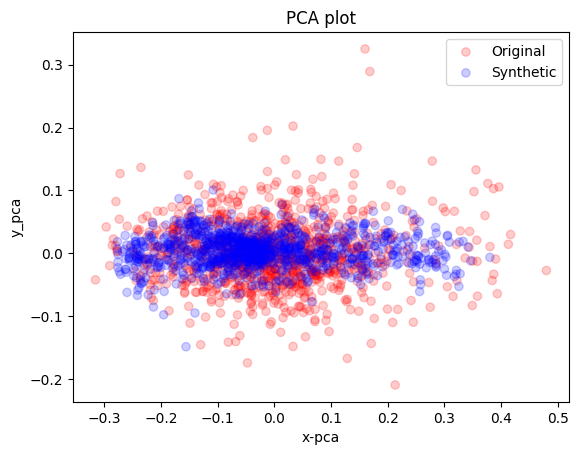

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.013s...
[t-SNE] Computed neighbors for 2000 samples in 0.426s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.064699
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.129356
[t-SNE] KL divergence after 300 iterations: 2.245398


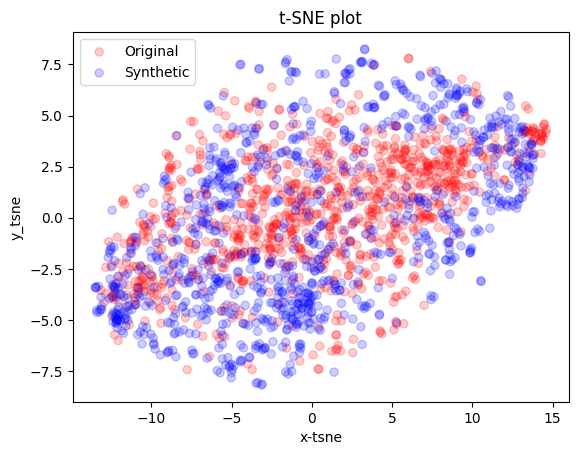

In [5]:
visualization(ori_data, generated_data, 'pca')
visualization(ori_data, generated_data, 'tsne')

In [5]:
# generated_df = list_to_df(generated_data)
print(np.shape(gen_data))
print(np.shape(ori_data))

gen_data_indexless = []

for frame in gen_data:
    new_frame = []
    for sample in frame:
        new_frame.append(sample[1:])
    gen_data_indexless.append(new_frame)
print(np.shape(gen_data_indexless))


(28752, 24, 10)
(28776, 24, 9)
(28752, 24, 9)


In [7]:
# generated_df.plot()
generated_df = list_to_df(generated_data)
generated_df.to_csv('generated_data/gen_data_norm.csv')
generated_df.to_csv('generated_data/gen_data_norm_indexless.csv', index=False)

In [3]:
# gen_data = pd.read_csv('generated_data/gen_data.csv', index_col=0)
gen_data = real_data_loading('generated', seq_len)
visualization(ori_data, gen_data, 'pca')

IndexError: index 28762 is out of bounds for axis 0 with size 28752